# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [8,10]
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

## 1. Data Cleaning

In [2]:
df = pd.read_csv('classification_lab_data.csv')

In [3]:
df = df.rename(columns={'default payment next month':'DEFAULT_NEXT'})

In [4]:
df["DEFAULT_NEXT"].mean()

0.22117588232843036

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,-0.285845,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,1.150394,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# sorted(df["LIMIT_BAL"].unique())

In [7]:
# df["default payment next month"].mean()

In [8]:
# categories, accounts, defaults, ratio = [], [], [], []
# for category in list(range(df["AGE"].min(), df["AGE"].max()+1)):
#     categories.append(category)
#     accounts.append(df["AGE"][df["AGE"]==category].count())
#     defaults.append(df["default payment next month"][df["AGE"]==category].sum())
#     ratio.append(round(defaults[-1]/accounts[-1], 3))
# count_df = pd.DataFrame(list(zip(categories, accounts, defaults, ratio)), 
#                         columns=["age", "accounts", "defaults", "ratio"])
# count_df

In [9]:
# fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
# ax[0].bar(categories, np.subtract(accounts, defaults), width=0.8, label='accounts', bottom=defaults)
# ax[0].bar(categories, defaults, width=0.8, label='defaults')
# ax[0].set_ylabel("Defaults by Age")
# ax[0].set_xlabel("Age")
# ax[0].legend(loc="best")
# ax[1].bar(categories, ratio, width=0.8, label='ratio')
# ax[1].set_ylabel("Defaults/Accounts")
# ax[1].set_xlabel("Ratio")
# ax[1].legend(loc="best")
# fig.show()

In [10]:
cols = ["DEFAULT_NEXT", "LIMIT_BAL", "AGE","BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5","BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
# sns.pairplot(df, vars=cols)

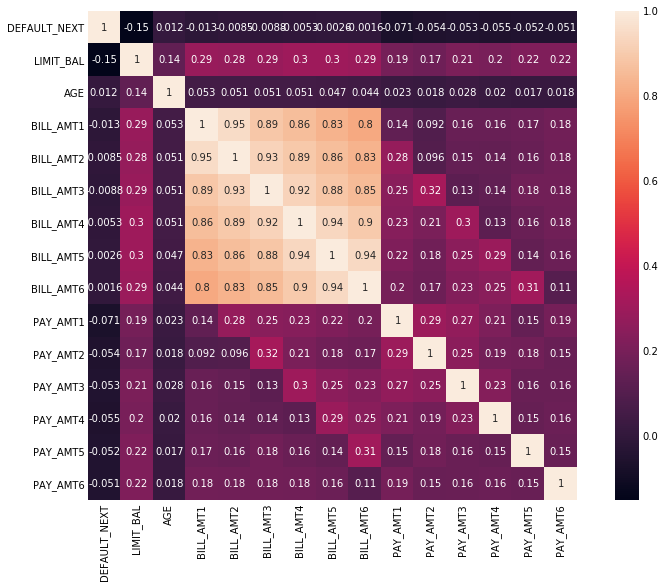

In [11]:
corrmat = df[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

In [12]:
# Create a function that returns the dataframe with accounts and defaults for each category
def default_freq(column_name, df):
    categories, accounts, defaults, ratio = [], [], [], []
    for category in range(df[column_name].min(), df[column_name].max()+1):
        categories.append(category)
        accounts.append(df[column_name][df[column_name]==category].count())
        defaults.append(df["DEFAULT_NEXT"][df[column_name]==category].sum())
        ratio.append(round(defaults[-1]/accounts[-1], 3))
    count_df = pd.DataFrame(list(zip(categories, accounts, defaults, ratio)), 
                            columns=[column_name.lower(), "accounts", "defaults", "ratio"])
    fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
    ax[0].bar(categories, np.subtract(accounts, defaults), width=0.8, label='accounts', bottom=defaults)
    ax[0].bar(categories, defaults, width=0.8, label='defaults')
    ax[0].set_ylabel("Defaults by {}".format(column_name.title()))
    ax[0].set_xlabel(column_name.title())
    ax[0].legend(loc="best")
    ax[1].bar(categories, ratio, width=0.8, label='ratio', color="orange")
    ax[1].set_ylabel("Defaults/Accounts")
    ax[1].set_xlabel(column_name.title())
    ax[1].legend(loc="best")
    return count_df, fig, ax

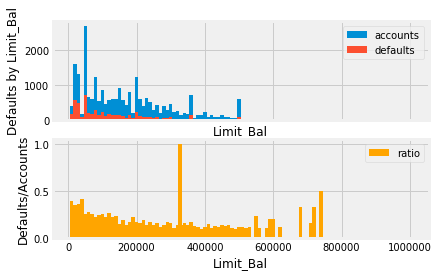

In [13]:
column_name = "LIMIT_BAL"

categories, accounts, defaults, ratio = [], [], [], []
for category in sorted(df["LIMIT_BAL"].unique()):
    categories.append(category)
    accounts.append(df[column_name][df[column_name]==category].count())
    defaults.append(df["DEFAULT_NEXT"][df[column_name]==category].sum())
    ratio.append(round(defaults[-1]/accounts[-1], 3))
count_df = pd.DataFrame(list(zip(categories, accounts, defaults, ratio)), 
                        columns=[column_name.lower(), "accounts", "defaults", "ratio"])
fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
ax[0].bar(categories, np.subtract(accounts, defaults), width=10000, label='accounts', bottom=defaults)
ax[0].bar(categories, defaults, width=10000, label='defaults')
ax[0].set_ylabel("Defaults by {}".format(column_name.title()))
ax[0].set_xlabel(column_name.title())
ax[0].legend(loc="best")
ax[1].bar(categories, ratio, width=10000, label='ratio', color="orange")
ax[1].set_ylabel("Defaults/Accounts")
ax[1].set_xlabel(column_name.title())
ax[1].legend(loc="best")
fig.show()

,sex,accounts,defaults,ratio
0,male,9513,2298,0.242
1,female,14486,3010,0.208


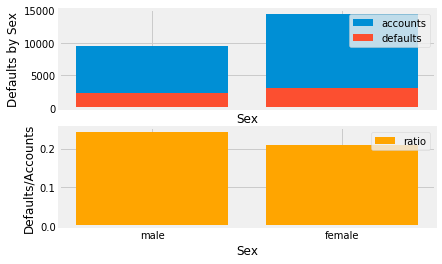

In [14]:
sex_freq, sex_fig, sex_ax = default_freq("SEX", df)
sexes = ["male", "female"]
plt.xticks([1,2], sexes)
sex_freq["sex"] = sexes
sex_freq

,education,accounts,defaults,ratio
0,wat,11,0,0.000
1,grad_school,8442,1616,0.191
2,college,11188,2656,0.237
3,high_school,3994,1012,0.253
4,other,100,5,0.050
5,huh,223,14,0.063
6,who,41,5,0.122


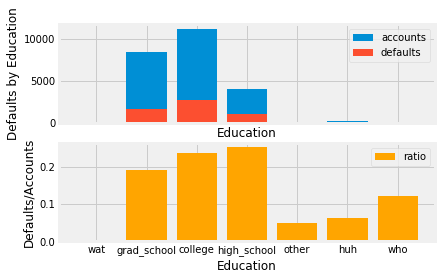

In [15]:
ed_freq, ed_fig, ed_ax = default_freq("EDUCATION", df)
eds = ["wat", "grad_school", "college", "high_school", "other", "huh", "who"]
plt.xticks(list(range(0,7)), eds)
ed_freq["education"] = eds
ed_freq

,marriage,accounts,defaults,ratio
0,wat,43,3,0.070
1,married,10958,2559,0.234
2,single,12735,2677,0.210
3,other,263,69,0.262


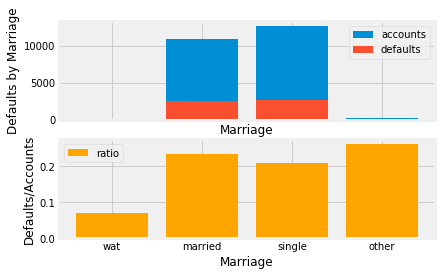

In [16]:
married_freq, married_fig, married_ax = default_freq("MARRIAGE", df)
married = ["wat", "married", "single", "other"]
plt.xticks([0,1,2,3], married)
married_freq["marriage"] = married
married_freq

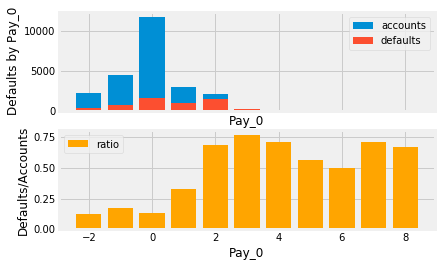

In [17]:
pay_0_freq, pay_0_fig, pay_0_ax = default_freq("PAY_0", df)

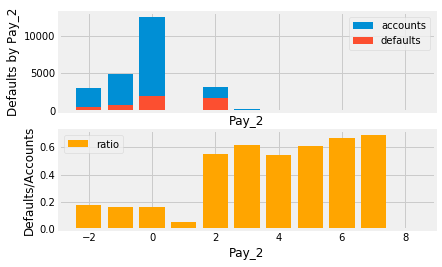

In [18]:
pay_2_freq, pay_2_fig, pay_2_ax = default_freq("PAY_2", df)

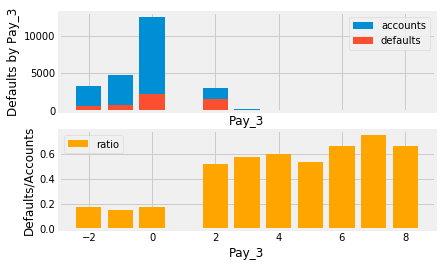

In [19]:
pay_3_freq, pay_3_fig, pay_3_ax = default_freq("PAY_3", df)

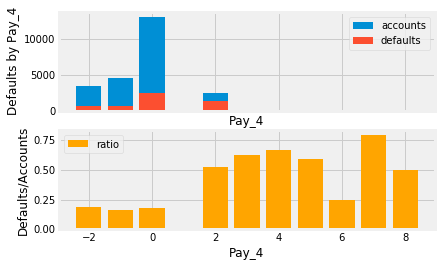

In [20]:
pay_4_freq, pay_4_fig, pay_4_ax = default_freq("PAY_4", df)

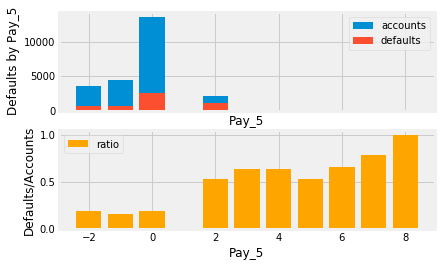

In [21]:
pay_5_freq, pay_5_fig, pay_5_ax = default_freq("PAY_5", df)

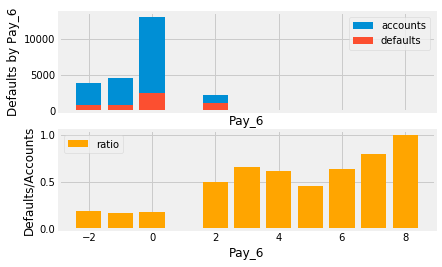

In [22]:
pay_6_freq, pay_6_fig, pay_6_ax = default_freq("PAY_6", df)

## 3. Feature Engineering

In [23]:
feat_df = df.copy()

pay_periods = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for pay_period in pay_periods:
    feat_df[pay_period][feat_df[pay_period]<=0] = 0

In [24]:
feat_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,0.356057,0.317805,0.303888,0.259136,0.222343,0.227343,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,0.759705,0.798341,0.787083,0.762796,0.719335,0.719046,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


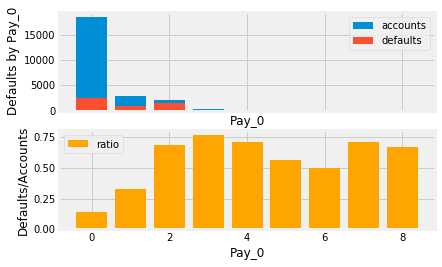

In [25]:
pay_0_freq, pay_0_fig, pay_0_ax = default_freq("PAY_0", feat_df)

In [26]:
# for col1 in ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "EDUCATION"]:
#     feat_df[col1] = feat_df[col1].astype("category").cat.as_ordered()

# for col2 in ["MARRIAGE"]:
#     feat_df[col2] = feat_df[col2].astype("category").cat.as_unordered()


# ed_dummy = pd.get_dummies(df["EDUCATION"], prefix="ED", drop_first=True)
# marry_dummy = pd.get_dummies(df["MARRIAGE"], prefix="MARRY", drop_first=True)

# feat_df = pd.concat([feat_df, ed_dummy, marry_dummy], axis=1)

# feat_df.drop(["EDUCATION", "MARRIAGE"], axis=1, inplace=True)
# feat_df.head()

In [27]:
ed_dummy = pd.get_dummies(feat_df["EDUCATION"], prefix="ED", drop_first=True)
# marry_dummy = pd.get_dummies(df["MARRIAGE"], prefix="MARRY", drop_first=True)

feat_df = pd.concat([feat_df, ed_dummy], axis=1)

feat_df.drop(["EDUCATION"], axis=1, inplace=True)
feat_df.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.550773,35.523230,0.356057,0.317805,0.303888,0.259136,0.222343,0.227343,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176,0.351765,0.466186,0.166424,0.004167,0.009292,0.001708
std,129915.115993,0.489158,0.522431,9.253986,0.759705,0.798341,0.787083,0.762796,0.719335,0.719046,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047,0.477531,0.498866,0.372468,0.064418,0.095948,0.041298
min,10000.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
pct_balance = (feat_df["BILL_AMT2"]+feat_df["BILL_AMT3"]+feat_df["BILL_AMT4"]+feat_df["BILL_AMT5"]+feat_df["BILL_AMT6"])/feat_df['LIMIT_BAL']

In [29]:
feat_df.drop(["BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"], axis=1, inplace=True)

In [30]:
feat_df["PCT_BAL"] = pct_balance

In [31]:
feat_df.shape

(23999, 25)

In [32]:
# age_grad = np.multiply(feat_df["AGE"], feat_df["ED_1"])
# age_college = np.multiply(feat_df["AGE"], feat_df["ED_2"])

# feat_df["AGE_GRAD"] = age_grad
# feat_df["AGE_COLLEGE"] = age_college

In [33]:
within_1std_age = df['AGE'].apply(lambda x: 1 if df['AGE'].mean()-df['AGE'].std() < x < df['AGE'].mean()+df['AGE'].std() else 0)

In [34]:
feat_df.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,PCT_BAL
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.550773,35.523230,0.356057,0.317805,0.303888,0.259136,0.222343,0.227343,51589.034710,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176,0.351765,0.466186,0.166424,0.004167,0.009292,0.001708,1.820500
std,129915.115993,0.489158,0.522431,9.253986,0.759705,0.798341,0.787083,0.762796,0.719335,0.719046,74104.132627,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047,0.477531,0.498866,0.372468,0.064418,0.095948,0.041298,1.743625
min,10000.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.967500
25%,50000.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3577.500000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133420
50%,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.358427
75%,240000.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.337544
max,1000000.000000,2.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.730550


## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [35]:
# function to reduce annoyance
def TTS_with_colnames(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
    allcols = []
    for col in X_train.columns:
        allcols.append(col)
    allcols.append(y_train.name)
    
    training  = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    training.columns = allcols
    return X_train, X_test, y_train, y_test, training

In [36]:
# Train Test Split
# Create matrix of features
X = feat_df.drop('DEFAULT_NEXT', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = feat_df['DEFAULT_NEXT'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns


In [37]:
# Logistic regression

X_train, X_test, y_train, y_test, training = TTS_with_colnames(X, y)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
y_pred_test = lr_clf.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

Test Accuracy score:  0.8235
Test F1 score:  0.47287207565953204


In [38]:
# separate minority and majority classes
no_default = training[training.DEFAULT_NEXT==0]
default = training[training.DEFAULT_NEXT==1]

# Get a class count to understand the class imbalance.
print('Default count: '+ str(len(default)))
print('Paid count: '+ str(len(no_default)))

Default count: 3982
Paid count: 14017


In [156]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(5, 26, 2))
for k in k_range:
    # instantiate the model (using a different value fopr K)
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit the model with data
    knn.fit(X_train, y_train)
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)    
    #fit the model and get the score on a evaluation metric
    accuracy = metrics.accuracy_score(y_pred_class, y_test)
    F1 = metrics.f1_score(y_pred_class, y_test)
    k_scores.append({k : (accuracy, F1)})
    print('k = ' + str(k) + ' Accuracy:' + str(metrics.accuracy_score(y_pred_class, y_test)))
    print('k = ' + str(k) + ' F1: ' + str(metrics.f1_score(y_pred_class, y_test)))
    print()

# Print out the scores to see which one is best. 

k = 5 Accuracy:0.7883333333333333
k = 5 F1: 0.42167577413479057

k = 7 Accuracy:0.7991666666666667
k = 7 F1: 0.4286391654812708

k = 9 Accuracy:0.8046666666666666
k = 9 F1: 0.4343629343629343

k = 11 Accuracy:0.8091666666666667
k = 11 F1: 0.4460570875665215

k = 13 Accuracy:0.8126666666666666
k = 13 F1: 0.451171875

k = 15 Accuracy:0.814
k = 15 F1: 0.4518664047151277

k = 17 Accuracy:0.8148333333333333
k = 17 F1: 0.45027214250371106

k = 19 Accuracy:0.8156666666666667
k = 19 F1: 0.45138888888888895

k = 21 Accuracy:0.8148333333333333
k = 21 F1: 0.4518993586581154

k = 23 Accuracy:0.8165
k = 23 F1: 0.45629629629629626

k = 25 Accuracy:0.8158333333333333
k = 25 F1: 0.4521566683192861



In [54]:
#KNN
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.816
F1: 0.46355685131195334


In [39]:
#Upsample minority
from sklearn.utils import resample
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(no_default), # match number in majority class
                          random_state=11) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([no_default, default_upsampled])

# check new class counts
upsampled.DEFAULT_NEXT.value_counts()

# trying logistic regression again with the balanced dataset
y_train_up = upsampled.DEFAULT_NEXT
X_train_up = upsampled.drop('DEFAULT_NEXT', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train_up, y_train_up)
upsampled_lr.fit(X_train_up, y_train_up)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

Test Accuracy score:  0.6191666666666666
Test F1 score:  0.41395229546037443


In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print("Testing F1 Score: ",metrics.f1_score(y_test, y_pred_test))

Test Accuracy score:  0.8233333333333334
Testing F1 Score:  0.49038461538461536


In [41]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train_up, y_train_up)

#predict the training set
y_pred_train_up = clf.predict(X_train_up)

#Predict the response for test dataset
y_pred_test_up = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test_up))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_up))

Test Accuracy score:  0.7528333333333334
Testing F1 Score: 0.5139298590626024


In [42]:
#Set up logistic regression with cross-validation using liblinear.
#Cs sets the inverse of the regularization strength, which will be optimized
#through cross-validation. Uses the default Stratified K-Folds
#CV generator, with 5 folds.
model_cv = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)
model_cv.fit(X_train_up, y_train_up)
columns = np.arange(X_train_up.shape[1])[~np.isclose(model_cv.coef_.ravel(), 0)]
print(X.columns)
print(columns)

# model_pred = upsampled_dt.predict(X_test)
model_cv_pred = model_cv.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, model_cv_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, model_cv_pred))

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'ED_1', 'ED_2', 'ED_3',
       'ED_4', 'ED_5', 'ED_6', 'PCT_BAL'],
      dtype='object')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23]
Test Accuracy score:  0.75
Test F1 score:  0.5158166559070368


In [43]:
y_pred_test_up.mean()

0.2875

## 6. Model Evaluation

In [44]:
hold_out_df = pd.read_csv("classification_lab_data_holdout_features.csv")
hold_out_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,30000,1,1,2,29,0,0,0,0,0,-1,17960,18968,19958,21448,15567,22,1610,1600,2050,341,22,5000
1,640000,2,1,2,30,0,0,0,0,0,0,116714,77893,60259,40539,26432,5018,4000,4000,2003,7202,5314,3535
2,270000,2,1,2,29,0,0,0,0,-1,-1,14728,20865,24812,12674,9486,2460,10000,5000,3900,9486,2460,0
3,160000,1,1,1,40,0,0,2,2,-1,2,4024,6484,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,160000,2,2,2,25,-1,-1,-1,-1,0,0,1532,0,465,1791,1644,956,0,465,1792,33,0,2394


In [45]:
feat_df = hold_out_df.copy()

pay_periods = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for pay_period in pay_periods:
    feat_df[pay_period][feat_df[pay_period]<=0] = 0

In [43]:
# Reengineering my features
ed_dummy = pd.get_dummies(feat_df["EDUCATION"], prefix="ED", drop_first=True)
# marry_dummy = pd.get_dummies(df["MARRIAGE"], prefix="MARRY", drop_first=True)

feat_df = pd.concat([feat_df, ed_dummy], axis=1)

feat_df.drop(["EDUCATION"], axis=1, inplace=True)
feat_df.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6
count,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000
mean,166118.980170,1.604233,1.556241,35.334611,0.359607,0.328945,0.304783,0.257290,0.218130,0.223463,49760.820363,47808.868855,45166.853191,41128.830362,38565.171971,37451.688219,5567.042160,5527.614064,5115.139310,4832.420263,4696.824363,5094.966172,0.357107,0.473588,0.153808,0.003833,0.009498,0.001666
std,129077.567796,0.489056,0.520139,9.071366,0.764196,0.815134,0.804524,0.754403,0.711274,0.700873,71720.028327,69632.867171,66612.318592,61857.157340,58892.693860,57404.431820,16012.069319,15659.285542,16087.560921,15406.424308,13933.732405,17705.018918,0.479187,0.499344,0.360794,0.061795,0.097004,0.040791
min,10000.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5684.000000,-69777.000000,-25443.000000,-46627.000000,-46627.000000,-46627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3454.000000,3095.000000,2500.000000,2084.000000,1615.000000,1116.000000,1000.000000,747.000000,390.000000,283.000000,191.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21909.000000,20784.000000,19543.000000,18587.000000,17664.000000,16644.000000,2081.000000,2000.000000,1799.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64655.000000,61413.000000,57985.000000,51336.000000,48803.000000,48382.000000,5000.000000,5000.000000,4408.000000,4000.000000,4054.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,780000.000000,2.000000,3.000000,73.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,630458.000000,646770.000000,693131.000000,628699.000000,823540.000000,501370.000000,423903.000000,361560.000000,338394.000000,400046.000000,332000.000000,527143.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
pct_balance = (feat_df["BILL_AMT2"]+feat_df["BILL_AMT3"]+feat_df["BILL_AMT4"]+feat_df["BILL_AMT5"]+feat_df["BILL_AMT6"])/feat_df['LIMIT_BAL']

In [45]:
feat_df.drop(["BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"], axis=1, inplace=True)
feat_df["PCT_BAL"] = pct_balance

In [46]:
feat_df.shape

(6001, 24)

In [47]:
# Predicting on the Holdout test data
X_holdout_test = feat_df
feature_cols = X_holdout_test.columns

model_pred = model_cv.predict(X_holdout_test)

X_holdout_test = scaler.transform(X_holdout_test)

model_cv_pred = model_cv.predict(X_holdout_test)
model_cv_pred.mean()

0.2784535910681553

In [137]:
model_cv_pred_df = pd.DataFrame(model_cv_pred)
model_cv_pred_df.to_csv("Lora_Eric_model_predict.csv",index=False)

## 7. Final Model